An autoencoder is a type of neural network architecture designed for unsupervised learning. It consists of an encoder and a decoder, and its primary objective is to learn a compact representation of input data. The encoder compresses the input data into a lower-dimensional representation (encoding), and the decoder reconstructs the original input from this encoding. The training process involves minimizing the reconstruction error, typically measured using a loss function like Mean Squared Error (MSE).

Key Components:


1.   Encoder: Maps input data to a compressed representation.
2.   Decoder: Reconstructs the original input from the encoded  
representation.





Applications:

1.Dimensionality reduction

2.Data compression

3.Anomaly detection

4.Generative modeling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [3]:
#x_train[0]

In [4]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

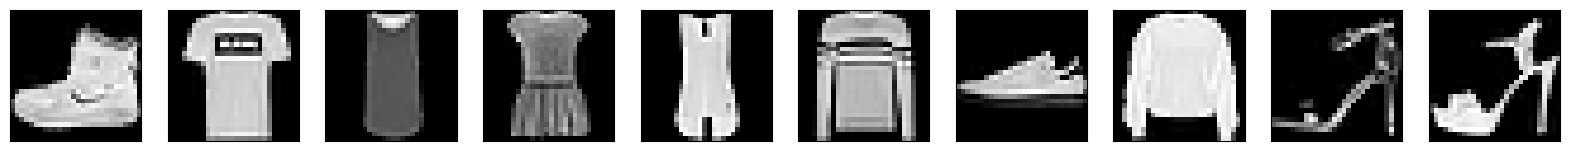

In [6]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
tf.random.set_seed(91)
np.random.seed(91)

## Encoder Architecture

In [8]:
# Define autoencoder architecture
def build_autoencoder(input_dim, encoding_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)

    # Decoder
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    # Build autoencoder model
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

In [9]:
# Set parameters
input_dim = 784  # 28x28 pixels flattened
encoding_dim = 32  # Adjustable, determines size of encoded representation

In [10]:
# Build autoencoder model
autoencoder = build_autoencoder(input_dim, encoding_dim)

In [11]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.4133 - val_loss: 0.3436
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.3278 - val_loss: 0.3197
Epoch 3/50
235/235 [==============================] - 4s 19ms/step - loss: 0.3116 - val_loss: 0.3084
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3022 - val_loss: 0.3007
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2957 - val_loss: 0.2954
Epoch 6/50
235/235 [==============================] - 3s 15ms/step - loss: 0.2915 - val_loss: 0.2922
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2890 - val_loss: 0.2902
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2874 - val_loss: 0.2889
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2863 - val_loss: 0.2880
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2855 - val_loss

In [12]:
# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


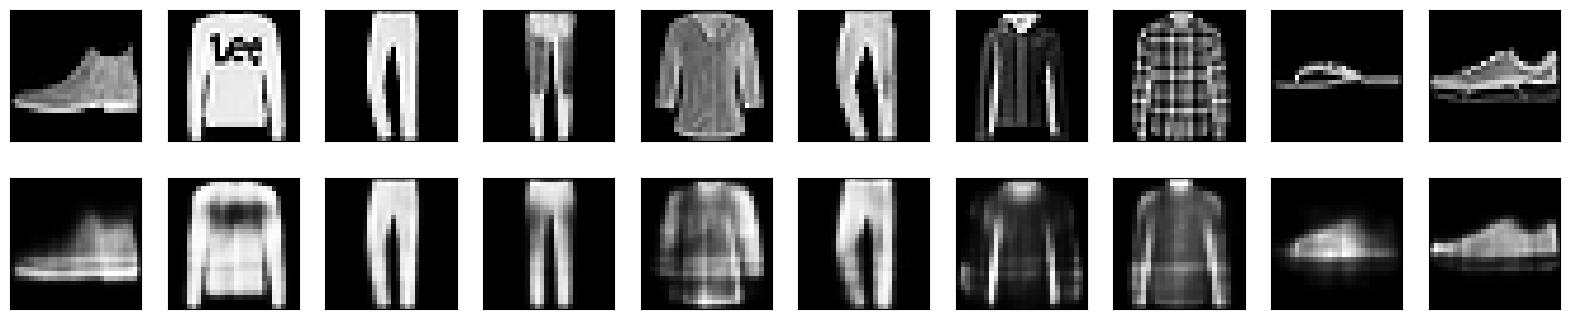

In [13]:
# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
